In [2]:
#importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#loading a dataset
df = pd.read_csv('D:\IOT PROJECT/fireandsmoke.csv', header=0)

In [4]:
#reading a head values
df.head()

,Formatted Date,Summary,Type,Temperature (C),Apparent Temperature (C),Humidity,Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,smoke,cooking smoke,24.472222,27.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,smoke,cooking smoke,32.355556,28.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,smoke,cooking smoke,43.377778,39.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,smoke,cooking smoke,43.377778,39.377778,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,smoke and fire,chemical fires,43.377778,39.377778,0.83,11.0446,259,15.8263,0,1016.51


In [5]:
#droping NaN values
df = df.dropna()

In [6]:
#printing shape of the dataset
print (df.shape)

(96453, 11)


In [7]:
#selecting the columns
print(list(df.columns))

['Formatted Date', 'Summary', 'Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']


In [8]:
#drop columns which are not needed
df.drop(df.columns[[0, 3, 7, 8, 9, 10]], 
   axis = 1, inplace = True)

In [9]:
#to ensure that index is properly selected
df.columns[4]

'Speed (km/h)'

In [10]:
df.head()

,Summary,Type,Apparent Temperature (C),Humidity,Speed (km/h)
0,smoke,cooking smoke,27.388889,0.89,14.1197
1,smoke,cooking smoke,28.227778,0.86,14.2646
2,smoke,cooking smoke,39.377778,0.89,3.9284
3,smoke,cooking smoke,39.377778,0.83,14.1036
4,smoke and fire,chemical fires,39.377778,0.83,11.0446


In [11]:
# creating one hot encoding of the categorical columns.
data = pd.get_dummies(df, columns =['Summary', 'Type','Apparent Temperature (C)', 'Humidity','Speed (km/h)'])

In [12]:
data.head()

,Summary_fire,Summary_smoke,Summary_smoke,Summary_smoke and fire,Type_appliances,Type_candles,Type_chemical fires,Type_cooking related,Type_cooking smoke,Type_electrical fires,...,Speed (km/h)_50.1354,Speed (km/h)_50.9726,Speed (km/h)_51.1497,Speed (km/h)_52.9368,Speed (km/h)_53.1944,Speed (km/h)_53.2427,Speed (km/h)_53.5969,Speed (km/h)_54.8849,Speed (km/h)_55.9314,Speed (km/h)_63.8526
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.columns

Index(['Summary_fire', 'Summary_smoke', 'Summary_smoke ',
       'Summary_smoke and fire', 'Type_appliances', 'Type_candles',
       'Type_chemical fires', 'Type_cooking related', 'Type_cooking smoke',
       'Type_electrical fires',
       ...
       'Speed (km/h)_50.1354', 'Speed (km/h)_50.9726', 'Speed (km/h)_51.1497',
       'Speed (km/h)_52.9368', 'Speed (km/h)_53.1944', 'Speed (km/h)_53.2427',
       'Speed (km/h)_53.5969', 'Speed (km/h)_54.8849', 'Speed (km/h)_55.9314',
       'Speed (km/h)_63.8526'],
      dtype='object', length=11124)

In [14]:
data

,Summary_fire,Summary_smoke,Summary_smoke,Summary_smoke and fire,Type_appliances,Type_candles,Type_chemical fires,Type_cooking related,Type_cooking smoke,Type_electrical fires,...,Speed (km/h)_50.1354,Speed (km/h)_50.9726,Speed (km/h)_51.1497,Speed (km/h)_52.9368,Speed (km/h)_53.1944,Speed (km/h)_53.2427,Speed (km/h)_53.5969,Speed (km/h)_54.8849,Speed (km/h)_55.9314,Speed (km/h)_63.8526
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96449,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96450,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96451,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data.columns[12]

'Apparent Temperature (C)_-26.22777778'

In [16]:
#dropping unkown values
data.drop(data.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)

In [17]:
data.columns

Index(['Summary_fire', 'Summary_smoke', 'Summary_smoke ',
       'Summary_smoke and fire', 'Type_appliances', 'Type_candles',
       'Type_chemical fires', 'Type_cooking related', 'Type_cooking smoke',
       'Type_electrical fires',
       ...
       'Speed (km/h)_50.1354', 'Speed (km/h)_50.9726', 'Speed (km/h)_51.1497',
       'Speed (km/h)_52.9368', 'Speed (km/h)_53.1944', 'Speed (km/h)_53.2427',
       'Speed (km/h)_53.5969', 'Speed (km/h)_54.8849', 'Speed (km/h)_55.9314',
       'Speed (km/h)_63.8526'],
      dtype='object', length=11119)

In [18]:
#create the X array
X = data.iloc[:,1:]

In [19]:
X.head ()

,Summary_smoke,Summary_smoke,Summary_smoke and fire,Type_appliances,Type_candles,Type_chemical fires,Type_cooking related,Type_cooking smoke,Type_electrical fires,Type_smoking,...,Speed (km/h)_50.1354,Speed (km/h)_50.9726,Speed (km/h)_51.1497,Speed (km/h)_52.9368,Speed (km/h)_53.1944,Speed (km/h)_53.2427,Speed (km/h)_53.5969,Speed (km/h)_54.8849,Speed (km/h)_55.9314,Speed (km/h)_63.8526
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y = data.iloc[:,0]

In [21]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Summary_fire, dtype: uint8

In [22]:
# logistic Regression
# We will use X_train and Y_train arrays for training our model and X_test and Y_test arrays for testing and validating.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [23]:
#creating a classifier
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [1]:
# predictions on your future data
classifier.fit(X_train, Y_train)

NameError: name 'classifier' is not defined

In [25]:
#predict method on the created object and pass the X array of the test data 
predicted_y = classifier.predict(X_test)

In [26]:
# prediction for each row in the X array
predicted_y

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [29]:
#The output indicates that the first and last values of the dataset
for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x, end="\t")

2	5	7	8	9	10	13	14	15	19	20	24	28	31	32	33	35	37	38	39	43	46	47	48	51	52	55	57	63	64	65	66	69	70	77	79	84	87	88	89	96	99	100	101	104	105	108	112	113	115	118	119	120	121	123	124	126	127	131	132	140	141	143	145	146	148	150	153	155	162	165	168	171	172	173	176	179	193	195	197	198	199	200	201	202	203	207	210	211	213	216	221	225	228	233	240	245	252	253	255	256	257	258	259	267	270	272	274	277	280	282	283	286	288	289	294	298	300	301	302	304	308	309	315	316	317	318	321	328	329	334	336	337	344	351	352	353	354	357	358	360	363	364	366	368	370	372	373	376	377	381	383	386	390	397	398	405	408	412	414	416	418	419	422	423	424	425	431	433	434	436	437	438	440	441	443	444	445	448	449	454	456	458	459	461	464	467	470	471	473	474	480	486	487	490	495	498	499	500	501	503	504	507	508	509	511	512	517	520	521	523	525	527	528	529	530	531	534	535	538	540	542	543	544	545	546	548	549	550	552	553	555	556	558	559	560	562	564	569	571	572	573	574	576	577	582	584	586	587	589	591	593	596	599	600	601	603	605	607	613	618	622

	5441	5449	5452	5453	5454	5455	5456	5457	5460	5461	5463	5465	5466	5468	5469	5474	5478	5479	5480	5484	5486	5488	5492	5494	5496	5498	5499	5503	5504	5510	5511	5512	5518	5519	5520	5521	5524	5528	5529	5530	5533	5534	5537	5538	5540	5542	5548	5551	5552	5553	5554	5555	5556	5557	5558	5560	5562	5566	5567	5569	5577	5580	5581	5582	5587	5589	5592	5595	5596	5607	5608	5609	5612	5613	5614	5618	5619	5622	5624	5627	5628	5629	5634	5638	5639	5641	5644	5645	5646	5660	5667	5668	5669	5670	5671	5672	5674	5675	5676	5678	5679	5683	5684	5685	5686	5687	5693	5697	5704	5705	5707	5710	5715	5716	5717	5719	5720	5721	5723	5728	5730	5737	5738	5741	5742	5744	5745	5747	5750	5753	5754	5758	5760	5762	5763	5764	5769	5770	5772	5775	5776	5780	5782	5785	5787	5791	5793	5794	5795	5796	5798	5801	5802	5808	5813	5814	5816	5817	5818	5827	5832	5833	5835	5839	5841	5842	5843	5845	5846	5849	5851	5852	5853	5854	5857	5860	5862	5867	5868	5872	5875	5876	5878	5880	5881	5882	5883	5885	5888	5889	5890	5891	5895	5897	5901	5906	5908	5909	5910	5911

10150	10151	10155	10156	10159	10160	10161	10165	10166	10167	10169	10171	10173	10174	10181	10182	10185	10188	10189	10194	10195	10196	10200	10201	10205	10206	10208	10212	10213	10214	10215	10216	10224	10226	10227	10230	10233	10238	10240	10242	10243	10246	10248	10249	10251	10259	10260	10262	10263	10264	10265	10267	10268	10273	10274	10276	10277	10280	10282	10283	10284	10288	10290	10291	10292	10293	10294	10299	10305	10311	10314	10316	10317	10326	10327	10328	10331	10333	10334	10335	10341	10343	10348	10355	10359	10362	10363	10365	10366	10369	10370	10374	10376	10378	10381	10382	10385	10388	10391	10393	10394	10400	10402	10405	10406	10408	10411	10412	10414	10416	10420	10421	10426	10434	10435	10436	10438	10439	10440	10441	10442	10445	10446	10448	10449	10450	10451	10454	10459	10464	10466	10471	10472	10474	10475	10479	10482	10484	10487	10489	10490	10492	10493	10495	10497	10498	10499	10500	10502	10507	10508	10512	10514	10517	10520	10523	10525	10528	10530	10532	10533	10535	10536	10539	10541	10545	1054

	16089	16091	16092	16093	16098	16101	16103	16105	16106	16107	16109	16115	16117	16118	16121	16128	16129	16130	16132	16137	16145	16146	16148	16149	16150	16155	16156	16157	16158	16160	16165	16166	16167	16168	16170	16180	16184	16185	16186	16187	16189	16190	16191	16192	16194	16197	16198	16200	16204	16213	16224	16225	16226	16227	16230	16231	16232	16233	16234	16237	16238	16240	16241	16243	16244	16258	16259	16263	16269	16272	16277	16280	16282	16284	16289	16296	16297	16301	16304	16305	16307	16311	16316	16317	16324	16326	16332	16337	16338	16346	16347	16349	16350	16351	16352	16353	16355	16359	16362	16363	16364	16366	16370	16372	16373	16378	16380	16381	16385	16388	16391	16392	16399	16402	16404	16405	16407	16408	16409	16410	16412	16416	16417	16418	16420	16421	16422	16427	16429	16431	16434	16435	16436	16439	16440	16442	16446	16447	16448	16450	16457	16459	16461	16464	16465	16466	16467	16468	16472	16473	16476	16478	16481	16485	16486	16487	16488	16494	16498	16501	16502	16505	16507	16508	16512	16514	165

22131	22136	22137	22138	22139	22140	22142	22143	22144	22145	22147	22148	22153	22154	22155	22157	22158	22159	22160	22161	22162	22168	22169	22170	22172	22173	22174	22175	22178	22179	22183	22184	22189	22192	22193	22194	22195	22199	22200	22204	22205	22206	22211	22212	22215	22217	22218	22220	22223	22224	22225	22227	22228	22232	22233	22235	22236	22237	22238	22239	22240	22242	22243	22244	22250	22251	22256	22257	22263	22265	22268	22269	22270	22272	22275	22276	22279	22280	22282	22283	22287	22289	22290	22291	22294	22295	22299	22301	22304	22305	22306	22307	22308	22309	22311	22320	22321	22322	22323	22324	22325	22329	22330	22336	22343	22344	22350	22354	22357	22359	22360	22362	22363	22366	22367	22369	22371	22373	22374	22377	22379	22380	22381	22382	22383	22384	22385	22388	22389	22391	22392	22393	22395	22398	22399	22400	22401	22403	22404	22409	22410	22411	22412	22413	22414	22416	22418	22421	22428	22431	22433	22436	22437	22441	22443	22449	22450	22451	22453	22454	22457	22463	22465	22471	22476	22477	2247

In [30]:
#To test the accuracy of the model, use the score method on the classifier 
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 1.00


In [31]:
# multiple regression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state = 1)

In [32]:
from sklearn import datasets, linear_model, metrics

Coefficients: 
 [-1. -1. -1. ...  0.  0.  0.]
Variance score: 0.9999692580647823


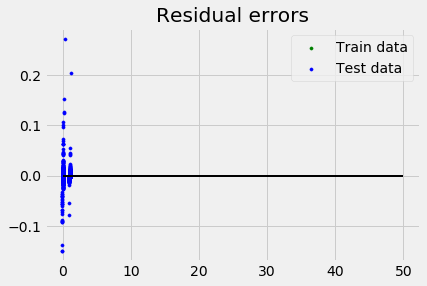

In [34]:
#create linear regression object and train the model
#residual analysis to verify that the conditions for drawing inferences about the coefficients in a linear model have been met.
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, Y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()